In [356]:
import cv2                                #black=0,white=255
import numpy as np
img = cv2.imread('lena.bmp')
Histogram= []
H_list = []
for i  in range (0,256):
    H_list.append(0)
x= [[0 for j in range(len(img[0]))] for i in range(len(img))]
for i in range (0,512):
    for j in range (0,512):
        H_list[img[i][j][0]]+=1
        Histogram.append(img[i][j][0])
        if(img[i][j][0]<128):
            x[i][j]=0
            img[i][j][0]=0
            img[i][j][1]=0
            img[i][j][2]=0
        else:
            x[i][j]=1
            img[i][j][0]=255
            img[i][j][1]=255
            img[i][j][2]=255
cv2.imwrite('lena_threshold128.jpg',img)

True

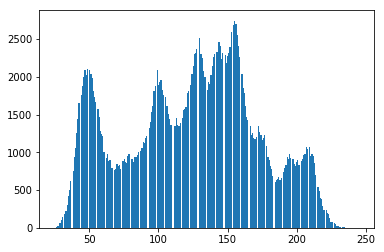

In [72]:
import matplotlib.pyplot as plt
plt.hist(Histogram,bins=256)
plt.savefig('Histgram.jpg')



In [357]:
# iterative connected components algorithms 
def iterativeCCA (img):
    row =len(img)
    col = len(img[0])
    label =  [[0 for j in range(col)] for i in range(row)]
    
    #initialize####
    num = 0
    for i in range (0,row):
        for j in range (0,col):
            if(img[i][j]==1):
                num+=1
                label[i][j]=num
            else:
                label[i][j]=0
    ############initialize end

    ############create label2 for neighbor check
    num+=1
    label2 =  [[0 for j in range(col+2)] for i in range(row+2)]
    for i in range (0,row+2):
        label2[0][i]=num
    for i in range (1,row+1):
        label2[i][0]=num
        for j in range (1,col+1):
            if(label[i-1][j-1]==0):
                label2[i][j]=num
            else:
                label2[i][j]=label[i-1][j-1]
        label2[i][col+1]=num
    for i in range (0,row+2):
        label2[row+1][i]=num        
    change=True
    while(change ==True):
        change=False
        for i in range(1,row):
            for j in range(1,col):
                if(label2[i][j]!=num):
                    M=icca_min_neighbors_8connected(label2,i,j)
                    if(label2[i][j]!=M):
                        change=True
                        label2[i][j]=M
        for i in range(row,0,-1):
            for j in range(col,0,-1):
                if(label2[i][j]!=num):
                    M=icca_min_neighbors_8connected(label2,i,j)
                    if(label2[i][j]!=M):
                        change=True
                        label2[i][j]=M              
    ####return label2 to label1
    for i in range (0,row):
        for j in range (0,col):
            if(label2[i+1][j+1]==num):
                label[i][j]=0
            else:
                label[i][j]=label2[i+1][j+1]
    
    return label
                
                
                
                

In [322]:
def icca_min_neighbors_8connected(label,i,j):
    #q=label[i-1][j-1]
    w=label[i-1][j]
    #e=label[i-1][j+1]
    a=label[i][j-1]
    s=label[i][j]
    d=label[i][j+1]
    #z=label[i+1][j-1]
    x=label[i+1][j]
    #c=label[i+1][j+1]  
    return min(w,a,s,d,x)
    
    


In [309]:
y = [[0,1,1,0,1,1,0],[0,1,1,0,1,1,0],[0,1,1,1,1,1,0]]

In [358]:
z= iterativeCCA (x)


In [311]:
a =[[0,0,0,0,1,0],[0,1,0,0,0,1],[1,0,1,0,1,0],[0,0,0,1,1,0],[0,0,0,0,1,0],[0,1,1,0,0,0]]

In [360]:
list_num=[]
list_num_sum=[]
list_num_big=[]
num=0
num_sum=0
for i in range (0,512):
    for j in range (0,512):
        same_num_flag=0
        for k in range(0,num):
            if(z[i][j]==list_num[k]):
                list_num_sum[k]+=1
                same_num_flag=1
                break
        if(same_num_flag==0):
            list_num.append(z[i][j])
            list_num_sum.append(1)
            num+=1
for i in range(0,num):
    if(list_num_sum[i]>=500):
        list_num_big.append(list_num[i])
        num_sum+=1

In [361]:
list_num_big

[1, 0, 73, 26099, 66809, 107770]

[0, 0, 0, 94, 237, 399] 
 [511, 511, 511, 237, 287, 511] 
 [0, 0, 127, 118, 89, 0] 
 [87, 511, 511, 157, 139, 31]


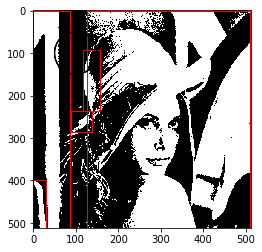

In [436]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
im = np.array(Image.open('lena_threshold128.jpg'))
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)
#############
x_min=[]
x_max=[]
y_min=[]
y_max=[]
for i in range (0,len(list_num_big)):
    
    x_min.append(512)
    x_max.append(0)
    y_min.append(512)
    y_max.append(0)
for k in range(0,len(list_num_big)):
  
    for i in range (0,512):
        for j in range(0,512):
            if(z[i][j]==list_num_big[k]):
                x_min[k]=min(x_min[k],i)
                x_max[k]=max(x_max[k],i)
                y_min[k]=min(y_min[k],j)
                y_max[k]=max(y_max[k],j)
print(x_min,'\n',x_max,'\n',y_min,'\n',y_max)
##########
# Create a Rectangle patch
for k in range(0,len(list_num_big)):
    if(list_num_big[k]==0):
        continue
    r=x_max[k]-x_min[k]
    l=y_max[k]-y_min[k]
    rect = patches.Rectangle((y_min[k],x_min[k]),l,r,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    
    ax.add_patch(app)
    # Add the patch to the Axes
plt.show()

In [352]:
for i in range (511,500,-1):
    for j in range(511,500,-1):
        print(img[i][j][0],end="")
    print()

00000000000
00000000000
00000000000
00000000000
00000000000
00000000000
00000000000
00000000000
00000000000
00000000000
00000000000


In [380]:
len(list_num_big)

6

In [471]:
img2 =cv2.imread('lena_threshold128.jpg')
x_min=[]
x_max=[]
y_min=[]
y_max=[]
for i in range (0,len(list_num_big)):
    
    x_min.append(512)
    x_max.append(0)
    y_min.append(512)
    y_max.append(0)
for k in range(0,len(list_num_big)):
    for i in range (0,512):
        for j in range(0,512):
            if(z[i][j]==list_num_big[k]):
                x_min[k]=min(x_min[k],i)
                x_max[k]=max(x_max[k],i)
                y_min[k]=min(y_min[k],j)
                y_max[k]=max(y_max[k],j)
for k in range(0,len(list_num_big)):
    if(list_num_big[k]==0):
        continue
    draw_rectangle(img2,x_min[k],y_min[k],x_max[k],y_max[k])
    draw_central(img2,x_min[k],y_min[k],x_max[k],y_max[k])
print(x_min,'\n',y_min,'\n',x_max,'\n',y_max)
cv2.imwrite('connected.jpg',img2)

[0, 0, 0, 94, 237, 399] 
 [0, 0, 127, 118, 89, 0] 
 [511, 511, 511, 237, 287, 511] 
 [87, 511, 511, 157, 139, 31]


True

In [438]:
img2 =cv2.imread('lena_threshold128.jpg')



In [470]:
def draw_rectangle(img,xmin,ymin,xmax,ymax):
    for j in range (ymin,ymax+1):
        img[xmin][j]=(0,0,255)
        img[xmax][j]=(0,0,255)
    for i in range (xmin,xmax+1):
        img[i][ymin]=(0,0,255)
        img[i][ymax]=(0,0,255)
def draw_central(img,xmin,ymin,xmax,ymax):
    x_middle=int((xmax+xmin)/2)
    y_middle=int((ymax+ymin)/2)
    img[x_middle][y_middle]=(0,0,255)
    for i in range (0,10):
        img[x_middle-i][y_middle]=(0,0,255)
    for i in range (0,10):
        img[x_middle+i][y_middle]=(0,0,255)
    for i in range (0,10):
        img[x_middle][y_middle-i]=(0,0,255)
    for i in range (0,10):
        img[x_middle][y_middle+i]=(0,0,255)

In [469]:
img3 =cv2.imread('lena_threshold128.jpg')
draw_rectangle(img3,0,127,511,511)
draw_central(img3,0,127,511,511)
cv2.imwrite('test.jpg',img3)

True

True